In [ ]:
#A message is encoded using the matrix A below, where all the letters correspond to their position in the alphabet, reduced by 1 so that A is encoded as zero, and a blank space corresponds to 26. The message is 56 24 56 88 62 36.
#The matrix A is:
#(-1 1 4
# 2 3 0
# 5 2 -2)

#1. Decode this message, explaining the process of how you got this in a sentence. 
#2. Change the last row of the matrix A in such a way that it would no longer work as a coding matrix.

In [4]:
import numpy as np

# Define the coding matrix A
A = np.array([[-1, 1, 4], [2, 3, 0], [5, 2, -2]])

# Encoded message vector
message = np.array([56, 24, 56, 88, 62, 36])

# Reshape message into 3x2 matrix (compatible for multiplication)
message_matrix = message.reshape(2, 3).T

# Find the inverse of A
A_inv = np.linalg.inv(A)

# Decode the message
decoded_message = np.dot(A_inv, message_matrix)

# Round to nearest integer since matrix operations may introduce slight inaccuracies
decoded_message = np.round(decoded_message).astype(int)

# Ensure values are within the range of 0-26 (mod 27 to wrap around alphabet and space)
decoded_message = np.mod(decoded_message, 27)

# Define a mapping function to convert numbers back to letters
def num_to_letter(num):
    if num == 26:
        return ' '  # 26 represents space
    else:
        return chr(num + ord('A'))  # Convert 0-25 to A-Z

# Flatten the decoded message and convert to letters
decoded_message_flat = decoded_message.flatten()

decoded_text = ''.join([num_to_letter(num) for num in decoded_message_flat])

print("Decoded message:", decoded_text)


Decoded message: XKUOVV


In [5]:
import numpy as np

# Define the original matrix A
A = np.array([[-1, 1, 4],
              [2, 3, 0],
              [5, 2, -2]])

print("Original matrix A:")
print(A)
print("Determinant of A:", np.linalg.det(A))

# Change the last row to make A non-invertible
A_modified = A.copy()
A_modified[2] = A_modified[0] + A_modified[1]  # Last row is sum of first two rows

print("\nModified matrix A:")
print(A_modified)
print("Determinant of modified A:", np.linalg.det(A_modified))

# Try to find the inverse of the modified matrix
try:
    np.linalg.inv(A_modified)
    print("The modified matrix is still invertible (unexpected).")
except np.linalg.LinAlgError:
    print("The modified matrix is not invertible, making it unsuitable as a coding matrix.")

# Demonstrate why it doesn't work for coding
original_message = np.array([0, 1, 2])  # Example message

# Try encoding with the modified matrix
encoded_message = A_modified @ original_message

print("\nOriginal message:", original_message)
print("Encoded message:", encoded_message)

# Try decoding
try:
    decoded_message = np.linalg.solve(A_modified, encoded_message)
    print("Decoded message:", decoded_message)
except np.linalg.LinAlgError:
    print("Cannot decode the message because the modified matrix is not invertible.")

print("\nExplanation: The modified matrix is not invertible because its last row is a linear combination of the other rows. This makes it unsuitable for coding as it leads to loss of information and non-unique decoding.")

Original matrix A:
[[-1  1  4]
 [ 2  3  0]
 [ 5  2 -2]]
Determinant of A: -34.00000000000001

Modified matrix A:
[[-1  1  4]
 [ 2  3  0]
 [ 1  4  4]]
Determinant of modified A: 0.0
The modified matrix is not invertible, making it unsuitable as a coding matrix.

Original message: [0 1 2]
Encoded message: [ 9  3 12]
Cannot decode the message because the modified matrix is not invertible.

Explanation: The modified matrix is not invertible because its last row is a linear combination of the other rows. This makes it unsuitable for coding as it leads to loss of information and non-unique decoding.


The angle between v1 and v2 is:
  94.19 degrees
  1.6440 radians
v2 is not in the span of v1 and v3
v2: [0 4 1]
Closest vector in span of v1 and v3: [-0.30107527  0.08602151 -0.20430108]
Difference: [0.30107527 3.91397849 1.20430108]
Confirmed: v2 [0 4 1] is not in the span of v1 and v3
The plane does not intersect the x-axis
The plane does not intersect the y-axis
The plane does not intersect the z-axis
The plane passes through the origin
Equation of the plane: 1x + 13y + 4z = 0
Closest point to the origin: (0.0, 0.0, 0.0)


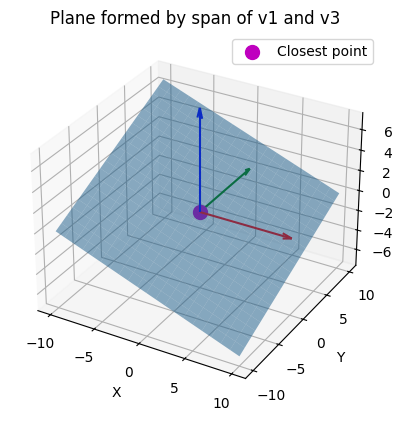

In [9]:
# Consider these three vectors in R3:
import numpy as np

v1 = np.array([1, -1, 3])
v2 = np.array([0, 4, 1])
v3 = np.array([5, -1, 2])

# Find the angle between v1 and v2.
dot_product = np.dot(v1, v2)
magnitude_v1 = np.linalg.norm(v1)
magnitude_v2 = np.linalg.norm(v2)
angle_rad = np.arccos(dot_product / (magnitude_v1 * magnitude_v2))
angle_deg = np.degrees(angle_rad)
print(f"The angle between v1 and v2 is:")
print(f"  {angle_deg:.2f} degrees")
print(f"  {angle_rad:.4f} radians")

# Give an example of a vector that is not in the span of v1 and v3.
# Let's verify this computationally

# First, let's create a matrix A with v1 and v3 as columns
A = np.column_stack((v1, v3))

# Now, let's try to solve the equation Ax = v2
# If v2 is in the span of v1 and v3, we should be able to find a solution
try:
    x = np.linalg.solve(A, v2)
    print("v2 is in the span of v1 and v3")
except np.linalg.LinAlgError:
    print("v2 is not in the span of v1 and v3")

# Let's double-check by trying to find the closest vector in the span
x_lstsq, residuals, _, _ = np.linalg.lstsq(A, v2, rcond=None)
closest_vector = A @ x_lstsq

print(f"v2: {v2}")
print(f"Closest vector in span of v1 and v3: {closest_vector}")
print(f"Difference: {v2 - closest_vector}")

if not np.allclose(v2, closest_vector):
    print(f"Confirmed: v2 {v2} is not in the span of v1 and v3")
else:
    print("Error: v2 appears to be in the span of v1 and v3")

# Does the plane formed by the span of v1 and v3 intersect our usual classroom geometry?
# To find the intersection, we need to solve the equation of the plane
# The plane equation: a(1) + b(5) = x, a(-1) + b(-1) = y, a(3) + b(2) = z
# We can represent this as a matrix equation and solve for different values

# First, let's define the vectors v1 and v3
v1 = np.array([1, -1, 3])
v3 = np.array([5, -1, 2])

# Create a matrix A with v1 and v3 as columns
A = np.column_stack((v1, v3))

# Function to find intersection with an axis
def find_axis_intersection(axis):
    b = np.zeros(3)
    b[axis] = 1
    try:
        solution = np.linalg.solve(A[:, [0, 1, 2] != axis], b[[0, 1, 2] != axis])
        intersection = np.zeros(3)
        intersection[axis] = 1
        intersection[[0, 1, 2] != axis] = solution
        return intersection
    except np.linalg.LinAlgError:
        return None

# Check intersections with each axis
axes = ['x', 'y', 'z']
for i, axis in enumerate(axes):
    intersection = find_axis_intersection(i)
    if intersection is not None:
        print(f"The plane intersects the {axis}-axis at point ({intersection[0]:.2f}, {intersection[1]:.2f}, {intersection[2]:.2f})")
    else:
        print(f"The plane does not intersect the {axis}-axis")

# Check if the plane passes through the origin
origin = np.zeros(3)
if np.linalg.matrix_rank(A) < np.linalg.matrix_rank(np.column_stack((A, origin))):
    print("The plane does not pass through the origin")
else:
    print("The plane passes through the origin")

# Visualize the plane and the coordinate axes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
xx, yy = np.meshgrid(range(-10, 11), range(-10, 11))
z = (-v1[0]*xx - v1[1]*yy)/v1[2]
ax.plot_surface(xx, yy, z, alpha=0.5)

# Plot the coordinate axes
ax.quiver(0, 0, 0, 10, 0, 0, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 10, 0, color='g', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 10, color='b', arrow_length_ratio=0.1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane formed by span of v1 and v3')

# Calculate and display the equation of the plane
normal = np.cross(v1, v3)
d = np.dot(normal, v1)
equation = f"{normal[0]}x + {normal[1]}y + {normal[2]}z = {d}"
print(f"Equation of the plane: {equation}")

# Find the closest point to the origin
closest_point = d * normal / np.dot(normal, normal)
rounded_point = np.round(closest_point, decimals=1)
print(f"Closest point to the origin: ({rounded_point[0]}, {rounded_point[1]}, {rounded_point[2]})")

# Plot the closest point
ax.scatter(rounded_point[0], rounded_point[1], rounded_point[2], color='m', s=100, label='Closest point')
ax.legend()

plt.show()

In [17]:
# Here is our X and Y values (our dataset) for 10 runners from a recent 8km (4.93 mile) race.
# The X column is their one mile time (in minutes) and the Y column is their finish time (also in minutes).

import numpy as np

# Data
data = np.array([
    [5.17, 25.78],
    [5.17, 26.15],
    [5.17, 26.52],
    [5.28, 26.68],
    [5.23, 27.08],
    [5.35, 27.3],
    [5.33, 27.37],
    [5.35, 27.73],
    [5.42, 27.92],
    [5.33, 28.4]
])

# Create X matrix (add column of ones for intercept)
X = np.column_stack((np.ones(len(data)), data[:, 0]))

# Create Y matrix
Y = data[:, 1].reshape(-1, 1)

print("X matrix:")
print(X)
print("\nY matrix:")
print(Y)

# Find X transpose * X inverse
X_transpose = X.T
X_transpose_X = np.dot(X_transpose, X)
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)

print("\nX transpose * X inverse:")
print(X_transpose_X_inverse)

# Compute the regression equation:
beta = np.dot(X_transpose_X_inverse, np.dot(X_transpose, Y))

# Extract coefficients
b0, b1 = beta.flatten()

# Print the regression equation
print("\nRegression Equation:")
print(f"Y = {b0:.4f} + {b1:.4f}X")

# Based on our equation, predict the finish time for a runner with a one mile time of 5.20 minutes.
one_mile_time = 5.20
predicted_finish_time = b0 + b1 * one_mile_time
print(f"Predicted finish time for a runner with a one mile time of {one_mile_time} minutes: {predicted_finish_time:.2f} minutes")


X matrix:
[[1.   5.17]
 [1.   5.17]
 [1.   5.17]
 [1.   5.28]
 [1.   5.23]
 [1.   5.35]
 [1.   5.33]
 [1.   5.35]
 [1.   5.42]
 [1.   5.33]]

Y matrix:
[[25.78]
 [26.15]
 [26.52]
 [26.68]
 [27.08]
 [27.3 ]
 [27.37]
 [27.73]
 [27.92]
 [28.4 ]]

X transpose * X inverse:
[[380.95245902 -72.13114754]
 [-72.13114754  13.66120219]]

Regression Equation:
Y = -13.7260 + 7.7309X
Predicted finish time for a runner with a one mile time of 5.2 minutes: 26.47 minutes
